https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df["age"] = df["age"].astype(int)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
columns = df.drop("DEATH_EVENT", axis = 1).columns
columns = columns.to_list()
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

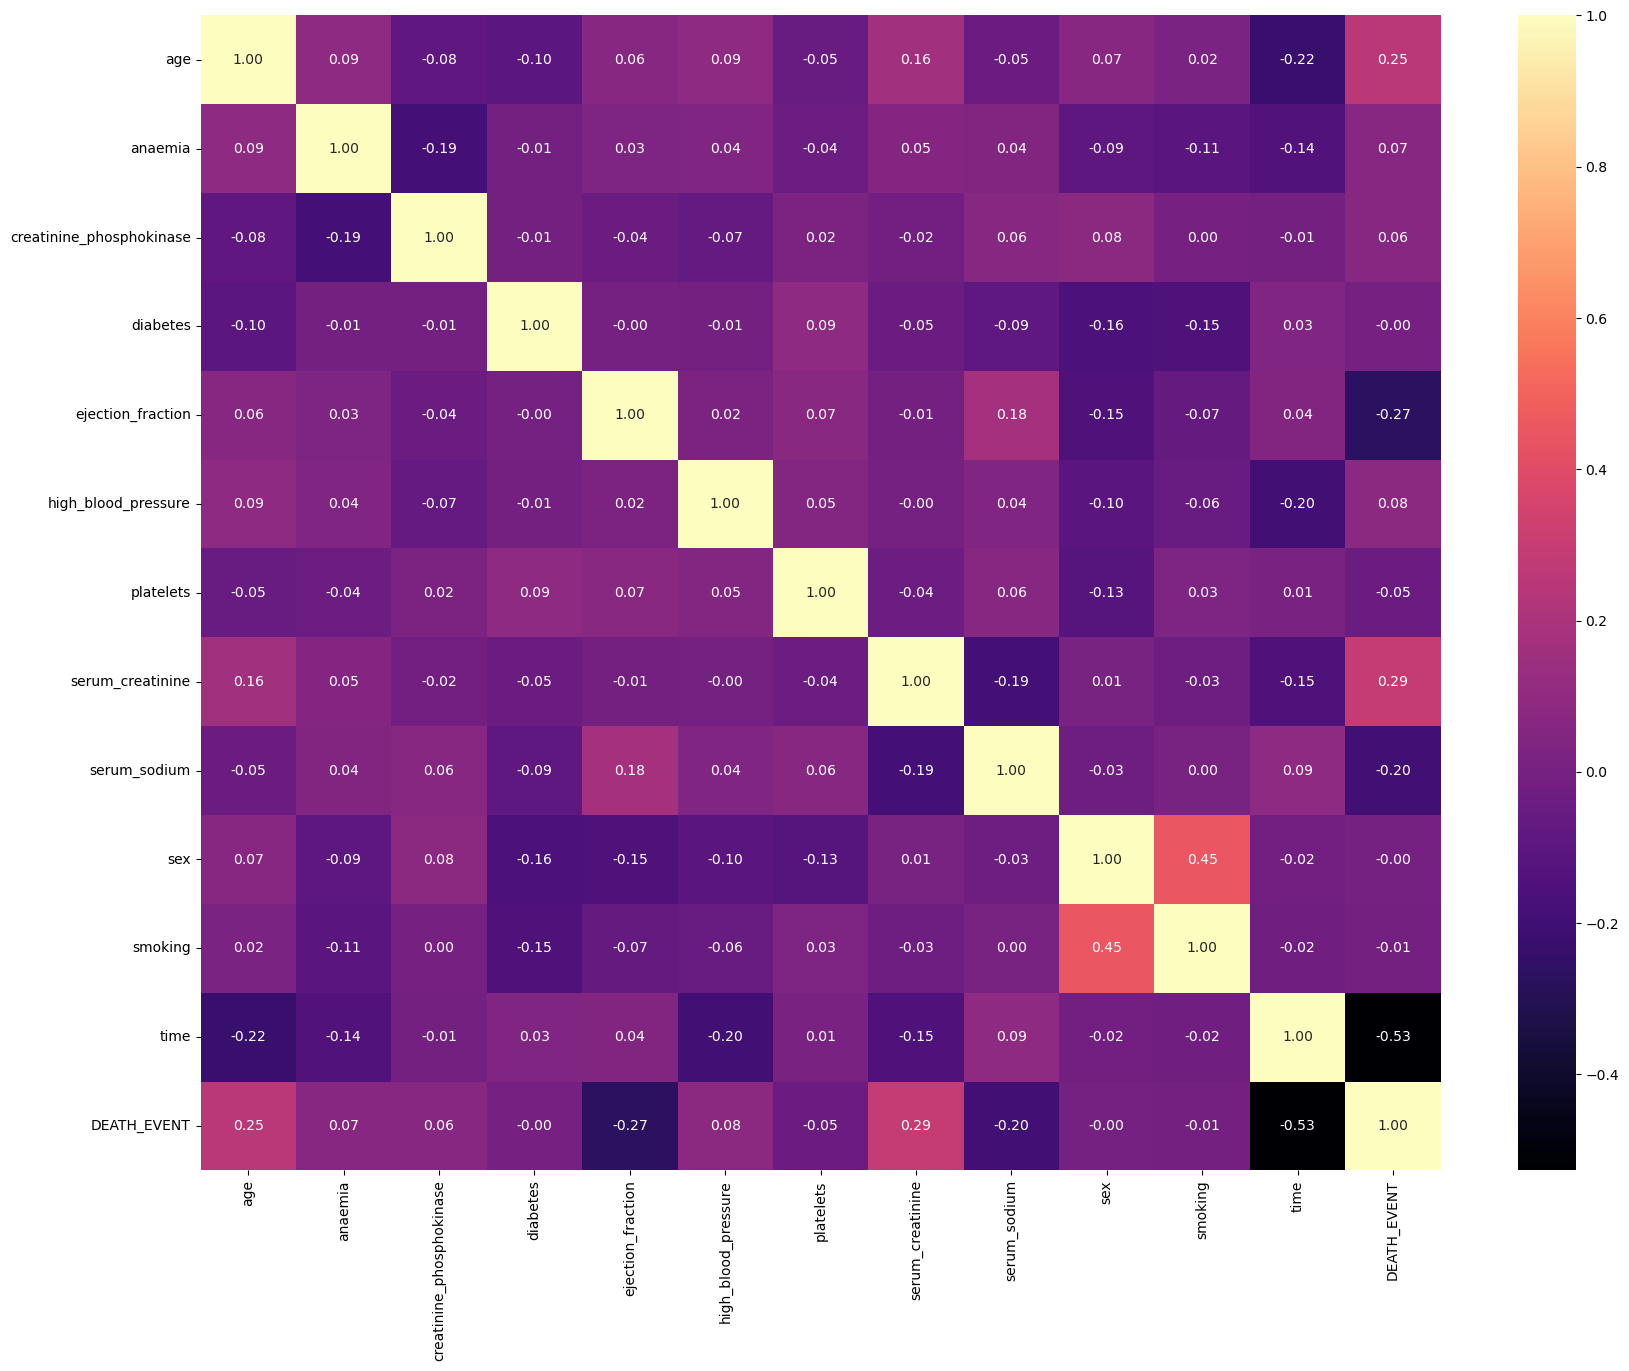

In [10]:
cm = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "magma")
plt.show()

<Axes: xlabel='age', ylabel='ejection_fraction'>

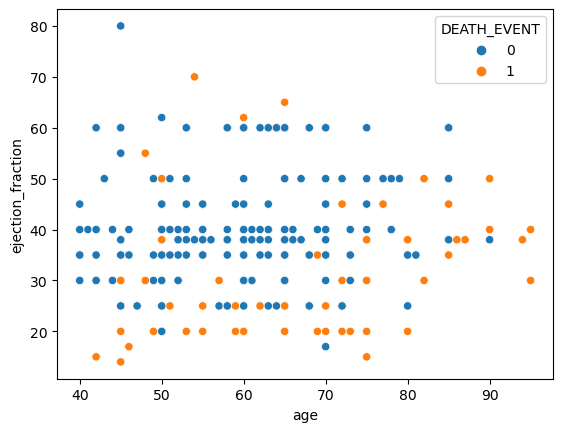

In [11]:
sns.scatterplot(x = "age", y = "ejection_fraction", data = df, hue = "DEATH_EVENT")

In [12]:
count = df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 1)]

<Axes: xlabel='DEATH_EVENT'>

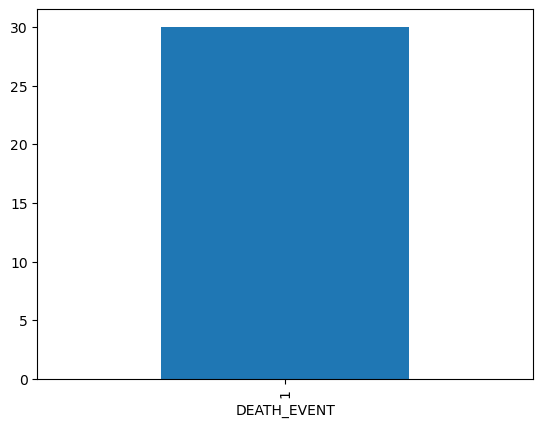

In [13]:
count["DEATH_EVENT"].value_counts().plot(kind = "bar")

<Axes: xlabel='serum_sodium', ylabel='Density'>

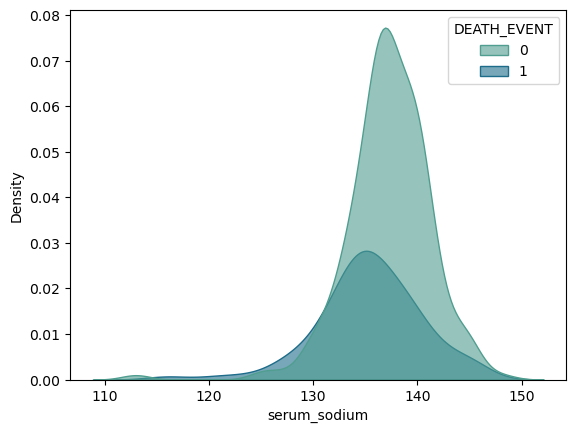

In [14]:
sns.kdeplot(x = "serum_sodium", hue = "DEATH_EVENT", fill = True, palette = "crest", alpha = 0.6, data = df)

<Axes: xlabel='serum_sodium', ylabel='time'>

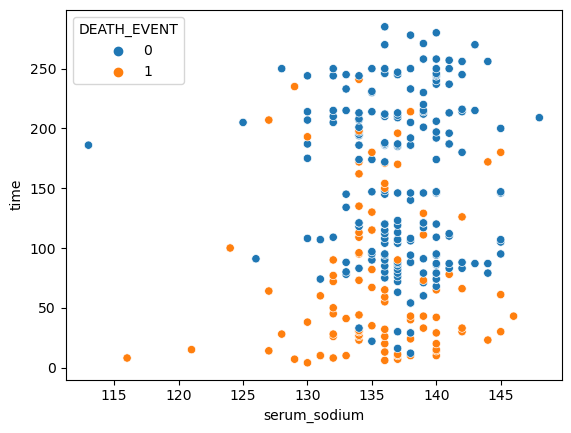

In [15]:
sns.scatterplot(x = "serum_sodium", y = "time", data = df, hue = "DEATH_EVENT")

<Axes: xlabel='platelets', ylabel='Density'>

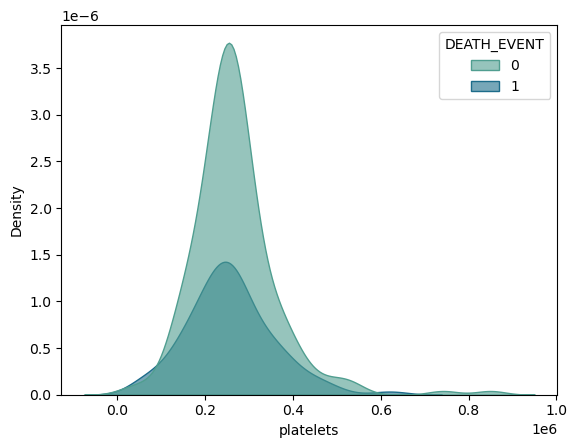

In [16]:
sns.kdeplot(x = "platelets", hue = "DEATH_EVENT", fill = True, palette = "crest", alpha = 0.6, data = df)

<Axes: xlabel='platelets', ylabel='serum_sodium'>

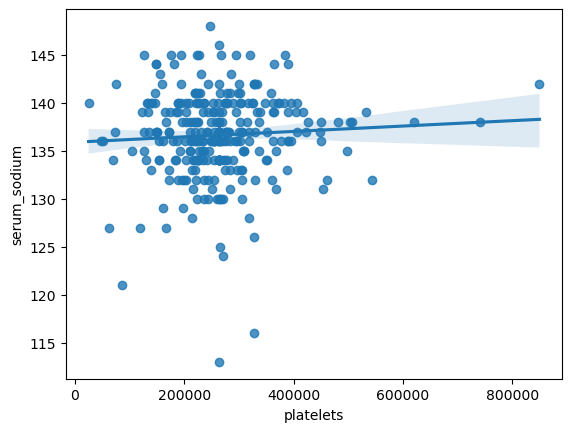

In [17]:
sns.regplot(x = "platelets", y = "serum_sodium", data = df)

fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))  
k = 0  
for i in range(3):  
    for j in range(4):  
        sns.scatterplot(ax = axis[i][j], x = df[columns[k]], y = df['DEATH_EVENT'])  

In [18]:
df.shape

(299, 13)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [20]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
models = {
          rfc : {"criterion": ['gini', 'entropy', 'log_loss'], "min_samples_split" : [1, 2], "min_samples_leaf" : [1, 2]},
          dtc : {"criterion": ['gini', 'entropy', 'log_loss'], "min_samples_split" : [1, 2], "min_samples_leaf" : [1, 2]},
          svc : {'C' : [.0001, .001, .01, .1], "gamma" : [.001, .01, .1]},
          knn : {"n_neighbors" : [2, 3, 4, 5], "weights" : ["uniform", "distance"]},
          xgb : {"n_estimators" : [2, 3, 5]}
         }

X = df.drop("DEATH_EVENT", axis = 1)
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) 

In [21]:
models_with_best_parameters = {}
j = 0
for i in models:
    grid_model = GridSearchCV(i, param_grid = models[i], cv = 5)
    grid_model.fit(X_train, y_train)
    models_with_best_parameters[grid_model.best_estimator_] = grid_model.best_params_
    j += 1

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "E:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

In [22]:
model_names = ["Random Forest Classifer", "Decision Tree Classifier", "Support Vector", "K Neighbors Classifier", "XGB Classifier"]
best_models_without_params = []
k = 0
for i in models_with_best_parameters:
    y_pred = i.predict(X_test)
    best_models_without_params.append(i)
    print(f"Classification report for {model_names[k]} is\n\n", classification_report(y_test, y_pred))
    print()
    print("Accuracy score is ", accuracy_score(y_test, y_pred))
    print()
    k += 1

Classification report for Random Forest Classifer is

               precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.62      1.00      0.77         5

    accuracy                           0.90        30
   macro avg       0.81      0.94      0.85        30
weighted avg       0.94      0.90      0.91        30


Accuracy score is  0.9

Classification report for Decision Tree Classifier is

               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.92      0.98      0.94        30
weighted avg       0.97      0.97      0.97        30


Accuracy score is  0.9666666666666667

Classification report for Support Vector is

               precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1   

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
best_models_accuracies = []
for i in best_models_without_params:
    best_models_accuracies.append(np.array(cross_val_score(estimator = best_models_without_params[0] ,X = X, y = y, cv = 5)))

In [24]:
best_models_accuracies

[array([0.43333333, 0.86666667, 0.83333333, 0.68333333, 0.6779661 ]),
 array([0.43333333, 0.81666667, 0.81666667, 0.71666667, 0.6779661 ]),
 array([0.41666667, 0.83333333, 0.83333333, 0.66666667, 0.6779661 ]),
 array([0.46666667, 0.86666667, 0.81666667, 0.68333333, 0.69491525]),
 array([0.45      , 0.85      , 0.85      , 0.7       , 0.69491525])]

In [25]:
avg_accuracies = []
for i in range(5):
    avg_accuracies.append((np.mean(best_models_accuracies[i])) * 100)

In [26]:
avg_accuracies

[69.89265536723164,
 69.22598870056497,
 68.55932203389831,
 70.56497175141244,
 70.89830508474574]

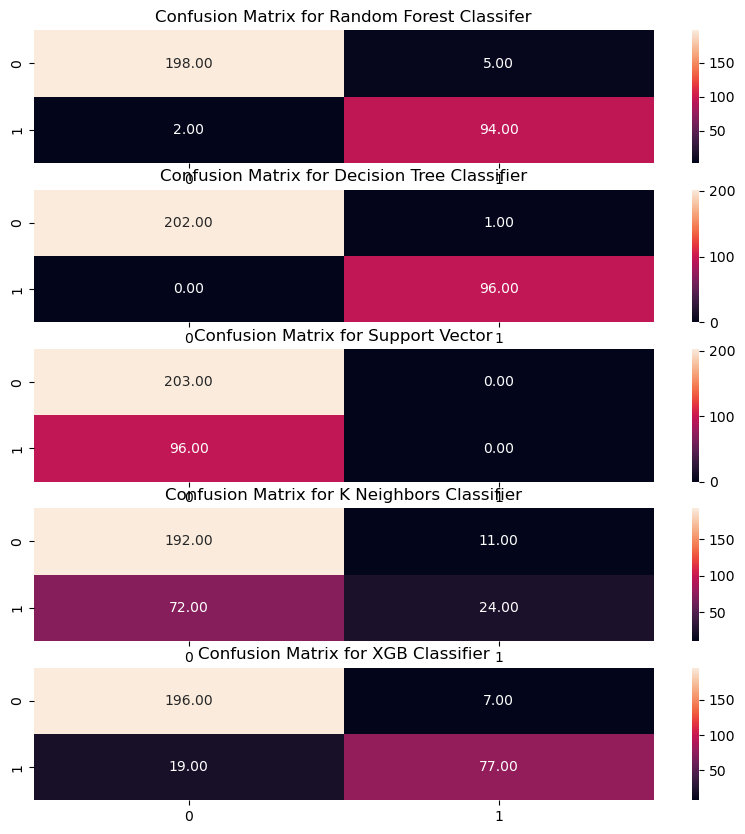

In [27]:
k = 0
fig, axis = plt.subplots(nrows = 5, figsize = (10, 10))
for i in best_models_without_params:
    cm = confusion_matrix(y, i.predict(X))
    axis[k].set_title(f"Confusion Matrix for {model_names[k]}")
    sns.heatmap(cm, annot = True, fmt = ".2f", ax = axis[k])
    print()
    print()
    k += 1